# Matplotlib : (https://matplotlib.org/)

In [14]:
# Copier et exécuter ce script dans IDLE
def install_and_import(package):
    import importlib
    try:
        importlib.import_module(package)
    except ImportError:
        import pip
        pip.main(['install', package])
    finally:
        globals()[package] = importlib.import_module(package)
# INSTALLATION : matplotlib
install_and_import('matplotlib')

# Exercice 1 : Température Moyenne
## Créer le tableau

In [4]:
#Q1.
import random as rd
def create_data(fname = "tempMoy.csv"):
    f = open(fname, "w")
    f.write("Année,Température Moyenne\n")
    for a in range(1930, 2021):
        f.write(str(a)+","+str(rd.randint(27, 40))+"\n")
    f.close()

In [7]:
create_data()

### Créer la courbe
Pour plus d'informations sur la bibliothèque **Matplotlib**, voir le site web : https://matplotlib.org/

In [16]:
import matplotlib.pyplot as plt
def plot_data(fname = "tempMoy.csv"):
    # lire les données à partir du tableau CSV
    f=open(fname, "r")
    lignes = f.readlines()[1:]
    f.close()
    tab = []
    for ligne in lignes:
        tab.append(ligne.split(","))
    #print(tab)
    # numériser le tableau
    date = []
    temp = []
    for lst in tab:
        date.append(int(lst[0]))
        temp.append(int(lst[1]))
    # Plot figure (temp vs date)
    plt.plot(date, temp)
    plt.xlabel("Année")
    plt.ylabel("Température")
    plt.title("Température Moyenne depuis 1930")
    plt.grid()
    plt.savefig("temp.png")
    plt.show()


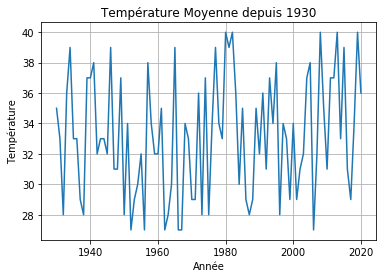

In [17]:
plot_data()

# Exercice 2 : Bulletin Étudiants

In [1]:
#Q1.
def saisie():
    while True:
        try:
            N = int(input("Entrer le nombre d'étudiants : "))
            assert N>0
        except ValueError:
            print("Veuillez entrer un nombre entier")
        except AssertionError:
            print("Veuillez entrer un nombre entier positif!")
        else:
            break
    return N

In [2]:
saisie()

Entrer le nombre d'étudiants : 3


3

In [3]:
# Q2.
def saisie_1():
    while True:
        ne = input("Saisir une chaine : ")
        if ne.isspace()!=True and not ne[0].isnumeric():
            break
    return ne

In [4]:
saisie_1()

Saisir une chaine : AA


'AA'

In [5]:
# Q3.
def saisie_2():
    while True:
        try:
            note = float(input("Entrer une note entre 0 et 20 : "))
            assert 0<= note <= 20
        except ValueError:
            print("Veuillez entrer un nombre entier positif!")
        except AssertionError:
            print("Veuillez entrer un nombre entre 0 et 20")
        else:
            break
    return note

In [6]:
saisie_2()

Entrer une note entre 0 et 20 : 6


6.0

In [21]:
def main(fname = "liste_etud.txt"):
    try:
        listeE = open(fname, "w")
        listeE.write("Nom & Prénom," + 9*" " + "Note Maths," + 4*" "+ \
                     "Note Physique," + 4*" " + "Note STI," + 4*" "+ \
                     "Note Info,\n")
        N = saisie()
        i = 1
        while i<=N:
            print("Enter un nom et un prénom : ")
            nom = saisie_1()
            prenom = saisie_1()
            print("Enter la note de Maths (M) : ")
            note_math = saisie_2()
            print("Enter la note de Physique (Ph) : ")
            note_physique = saisie_2()
            print("Enter la note de STI : ")
            note_sti = saisie_2()
            print("Enter la note de Informatique(Info) : ")
            note_info = saisie_2()
            listeE.write(nom + " " + prenom + "," + \
                         " "*(21-len(nom + " " + prenom))+ str(note_math)+ \
                         "," + " "*(14-len(str(note_math))) + \
                         str(note_physique) + "," +\
                         " "*(17-len(str(note_physique))) +\
                         str(note_sti)+ ","+" "*(12-len(str(note_sti))) + str(note_info) + "\n")
            i+=1
        listeE.close()
    except:
        print("Erreur!")

In [22]:
main()

Entrer le nombre d'étudiants : 3
Enter un nom et un prénom : 
Saisir une chaine : Ben Salem
Saisir une chaine : Amine
Enter la note de Maths (M) : 
Entrer une note entre 0 et 20 : 12
Enter la note de Physique (Ph) : 
Entrer une note entre 0 et 20 : 11
Enter la note de STI : 
Entrer une note entre 0 et 20 : 13
Enter la note de Informatique(Info) : 
Entrer une note entre 0 et 20 : 11
Enter un nom et un prénom : 
Saisir une chaine : Ben Ahmed
Saisir une chaine : Samia
Enter la note de Maths (M) : 
Entrer une note entre 0 et 20 : 14
Enter la note de Physique (Ph) : 
Entrer une note entre 0 et 20 : 16.5
Enter la note de STI : 
Entrer une note entre 0 et 20 : 17
Enter la note de Informatique(Info) : 
Entrer une note entre 0 et 20 : 13
Enter un nom et un prénom : 
Saisir une chaine : Gamra
Saisir une chaine : Karim
Enter la note de Maths (M) : 
Entrer une note entre 0 et 20 : 17
Enter la note de Physique (Ph) : 
Entrer une note entre 0 et 20 : 18
Enter la note de STI : 
Entrer une note entre 

1. Calculer la moyenne de chaque étudiant :

`Moy = ((M*5)+(Ph*4)+(STI*3)+(Info*2))/14`

In [23]:
def bulletin(fname1 = "liste_etud.txt", fname2 = "bulletin.txt"):
    with open(fname1, "r") as fe:
        lignes = fe.readlines()[1:]
        tab = []
        for ligne in lignes:
            l = ligne.split(",")
            moy = ((float(l[1])*5)+(float(l[2])*4)+(float(l[3])*3)+(float(l[4])*2))/14
            tab.append([l[0],moy])
        # Ranger les moyennes 
        tab2 = sorted(tab, key=lambda L: L[1], reverse=True)
        # Trouver le rang de chaque élève
        tab3=[]
        for i in range(len(tab2)):
            tab3.append([tab2[i][0], tab2[i][1], i+1])
        print(tab3)
        # Enregistrer le resultat dans un fichier
        with open(fname2, "w") as fb:
            fb.write("Nom&Prénom,"+" "*11+"Moyenne," + \
                  " "*5+"rang\n")
            for i in range(len(tab3)):
                fb.write(tab3[i][0] + ","+ " "*(21-len(tab3[i][0]))+"{:.2f}".format(tab3[i][1]) + \
                      "," + " "*(25-len(str(tab3[i][1])))+ str(tab3[i][2])+"\n")

In [24]:
bulletin()

[['Gamra Karim', 17.071428571428573, 1], ['Ben Ahmed Samia', 15.214285714285714, 2], ['Ben Salem Amine', 11.785714285714286, 3]]


# Exercice 3 : Randonnée

In [1]:
#Q1.
def importe_rando(nom_fichier):
    fichier=open(nom_fichier,"r")
    L = fichier.readlines()[1:] # pour ne pas traiter la 1ère ligne
    fichier.close()
    coords = []
    for ligne in L:
        l=ligne.split(",")
        l=[float(elt) for elt in l]
        coords.append(l)
    return coords

In [2]:
coords = importe_rando("suivi_rando.csv")
print(coords)

[[45.461516, 6.44461, 1315.221, 1597496965.0], [45.461448, 6.444426, 1315.702, 1597496980.0], [45.461383, 6.444239, 1316.182, 1597496995.0], [45.461641, 6.444035, 1316.663, 1597496710.0], [45.461534, 6.443879, 1317.144, 1597496725.0], [45.461595, 6.4437, 1317.634, 1597496740.0], [45.461562, 6.443521, 1318.105, 1597496755.0]]


In [3]:
#Q2.
def plus_haut(coords):
    lat,long,altmax =coords[0][:3]
    for elt in coords:
        if elt[2] > altmax:
            lat,long,altmax = elt[:3]
    return [lat,long]

In [4]:
plus_haut(coords)

[45.461562, 6.443521]

In [5]:
#Q3.
def deniveles(coords):
    pos,neg=0,0
    for i in range(len(coords)-1):
        a,b=coords[i][2],coords[i+1][2]
        if a>b: # dénivelé négatif
            neg+=b-a
        else: # dénivelé positif
            pos+=b-a
    return [pos,neg]

In [6]:
deniveles(coords)

[2.8840000000000146, 0]

In [15]:
#Q4.
from math import asin,sin,cos,sqrt,radians
RT = 6371 # variable globale donnée dans le canevas
def distance(c1,c2):
    phi1,l1,alt1=c1[:3] # phi,lambda et altitude pour le point c1
    phi2,l2,alt2=c2[:3] # idem pour c2
    phi1,phi2=radians(phi1),radians(phi2) # conversion en radians
    l1,l2=radians(l1),radians(l2)
    alt=RT*1e3+(alt1+alt2)/2 # conversion en mètres de RT + on rajoute l'altitude moyenne
    s=sin((phi2-phi1)/2)**2+cos(phi1)*cos(phi2)*sin((l2-l1)/2)**2
    s=sqrt(s)
    d=2*alt*asin(s) # formule de haversine
    dis=sqrt(d**2+(alt2-alt1)**2) # théorème de Pythagore
    return dis

In [16]:
distance(coords[0],coords[-1])

85.15227425277013

In [17]:
#Q5.
def distance_totale(coords):
    d=0
    for i in range(len(coords)-1):
        d+=distance(coords[i],coords[i+1])
    return d

In [18]:
distance_totale(coords)

112.33798223373815